In [1]:
## Importing modules and reading the data
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import re
import ast
df = pd.read_csv('TMDB_movies.csv')
listcolumns = df. columns. values. tolist() 
print(listcolumns)

['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count']


In [67]:
## Extraction
def extract_genres(x): 
    x = ast.literal_eval(x)
    Genres = [] 
    for item in x:
        Genres.append(item['name'])
    return Genres

## Applying the function to columns

df['extracted_genres'] = df['genres'].apply(extract_genres)
df['languages'] = df['spoken_languages'].apply(extract_genres)
df['production']=df['production_companies'].apply(extract_genres)

## Choosing 2 movies

favs = df[(df.original_title =='Finding Nemo')|(df.original_title == 'Kung Fu Panda')][['original_title','revenue', 'runtime','release_date','budget', 'popularity','vote_count','vote_average']]

## Locating disney films

disney = df[df['production_companies'].apply(lambda x: 'disney' in x.lower())]


## Extracting the year from release date and removing the row with a null value

df['year']= df.release_date.str.extract(r'(\d{4})')
df[df['year'].isnull()==True]
dfn = df[df['id']!=380097]
dfn['year']=dfn['year'].astype(int)

C:\Users\rache\AppData\Local\Temp\ipykernel_30272\3054894936.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn['year']=dfn['year'].astype(int)


# Overview
- There were **4803** movies in the database, **4505** of which were originally in English. 

- ***Minions (2015)*** was the most popular film, with a popularity of *875.5*. 

- ***Inception (2010)*** had the most votes, at *13752*, with an average vote of *8.1/10.*

In [27]:
df[df['vote_average'] == max(df['vote_average'])][['title', 'vote_average','year','vote_count']]


,title,vote_average,year,vote_count
3519,Stiff Upper Lips,10.0,1998,1
4045,"Dancer, Texas Pop. 81",10.0,1998,1
4247,Me You and Five Bucks,10.0,2015,2
4662,Little Big Top,10.0,2006,1


In [28]:
df[df['vote_count'] == max(df['vote_count'])][['title', 'vote_average','year','vote_count']]

,title,vote_average,year,vote_count
96,Inception,8.1,2010,13752


In [29]:
df[df['popularity'] == max(df['popularity'])][['title', 'vote_average','year','vote_count','popularity']]

,title,vote_average,year,vote_count,popularity
546,Minions,6.4,2015,4571,875.581305


In [9]:
df.shape

(4803, 24)

In [8]:
english = df[df['original_language'].apply(lambda x: 'en' in x.lower())]
english.shape

(4505, 24)

# Top 10 Films By Budget And Revenue
***Avatar*** had the highest revenue of all movies but wasn't among the highest budget films. Conversely, ***Pirates of the Caribbean: On Stranger Tides*** had the highest budget but was not one of the highest revenue films. The only movie that was in both the top 10 budget and revenue was ***Avengers: Age of Ultron***.

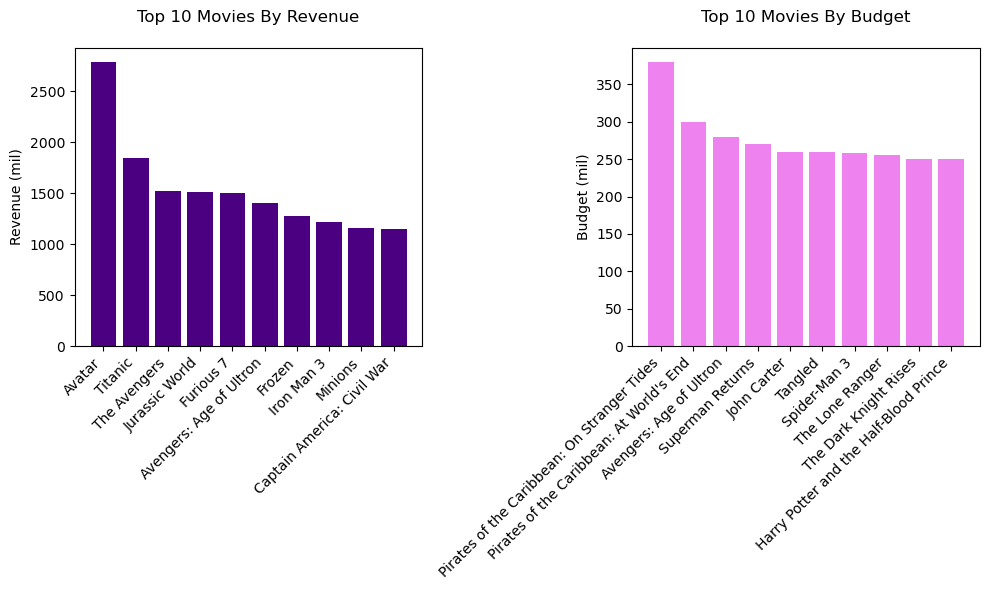

In [61]:

toptenrev = df.nlargest(10, 'revenue')[['original_title', 'revenue']]
titles_rev = toptenrev['original_title']
revenue = toptenrev['revenue'] / 1000000

toptenbud = df.nlargest(10, 'budget')[['original_title', 'budget']]
titles_bud = toptenbud['original_title']
budget = toptenbud['budget'] / 1000000

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Plot 1: Top 10 films by revenue
axes[0].bar(titles_rev, revenue, color = 'indigo')
axes[0].set_xticks(titles_rev)
axes[0].set_xticklabels(titles_rev, rotation=45, ha='right')
axes[0].set_ylabel('Revenue (mil)')
axes[0].set_title('Top 10 Movies By Revenue''\n')

# Plot 2: Top 10 movies by budget
axes[1].bar(titles_bud, budget, color = 'violet')
axes[1].set_xticks(titles_bud)
axes[1].set_xticklabels(titles_bud, rotation=45, ha='right')
axes[1].set_ylabel('Budget (mil)')
axes[1].set_title('Top 10 Movies By Budget''\n')

# Adjust layout
plt.tight_layout()

plt.show()


In [ ]:
dfc = df[['revenue','budget']]
dfc.corr()

# Top 10 Disney Movies By Revenue
Focusing specifically on movies produced by Disney, ***Frozen*** had the highest revenue, bringing in 1.27 billion dollars.

In [52]:

disney_movies = df[df['production_companies'].apply(lambda x: 'disney' in x.lower())]
max(disney_movies['revenue'])

1274219009

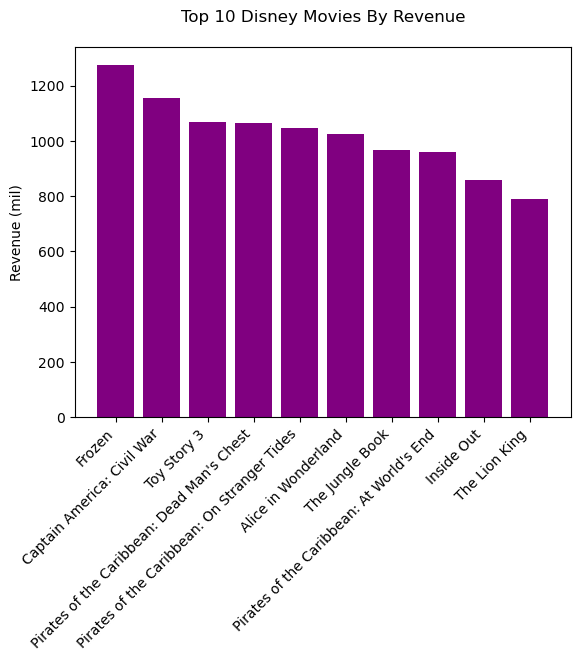

In [51]:
toptendis = disney.nlargest(10,'revenue')[['original_title', 'revenue']]
dis_title = toptendis['original_title']
dis_rev = toptendis['revenue']/1000000
plt.bar(dis_title, dis_rev, color = 'purple')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Revenue (mil)')
plt.title('Top 10 Disney Movies By Revenue''\n')
plt.show()

# Movies Released Per Year 
The number of movies released per year increased significantly in the database after the year 2000, peaking in 2009 with 247 movies.

In [46]:
dfy = dfn[dfn.year >2000]
dfy.groupby('year')[['title']].count()


,title
year,
2001,183
2002,203
2003,169
2004,204
2005,217
2006,237
2007,195
2008,227
2009,247


C:\Users\rache\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rache\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


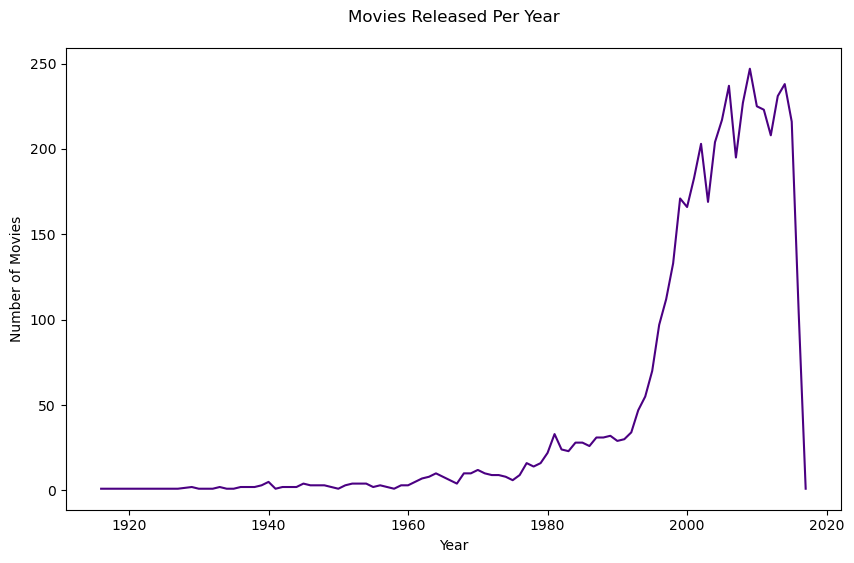

In [62]:

movie_counts = dfn['year'].value_counts().reset_index()
movie_counts.columns = ['year', 'count']


plt.figure(figsize=(10, 6))
sns.lineplot(data=movie_counts, x='year', y='count', markers=False, color = 'indigo')

plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Movies Released Per Year''\n')

plt.show()

# Movies Per Genre
The genre *Drama* had the most movies within it, whilst *TV Movies* had the least.

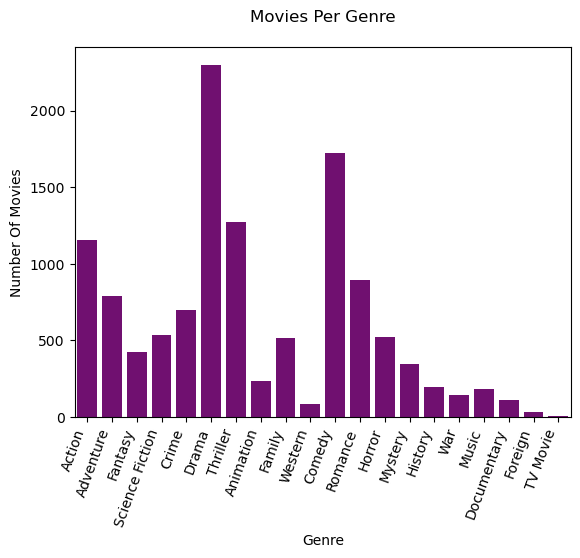

In [79]:
dftest = df.copy()
dfexplode = dftest['production'].explode().unique().tolist()
new = dftest['extracted_genres'].explode().tolist()
newdf = pd.DataFrame(new)
newdf = newdf[newdf[0].isnull() == False]
sns.countplot(newdf, x=0, color='purple')
plt.xticks(rotation =70, ha = 'right')
plt.title('Movies Per Genre''\n')
plt.ylabel('Number Of Movies')
plt.xlabel('Genre')
plt.show()

# Finding Nemo v. Kung Fu Panda
I chose to compare ***Finding Nemo*** and ***Kung Fu Panda*** as these are two of my favourite movies. ***Finding Nemo*** had better stats, with higher revenue, lower budget, similar popularity and a better vote average.

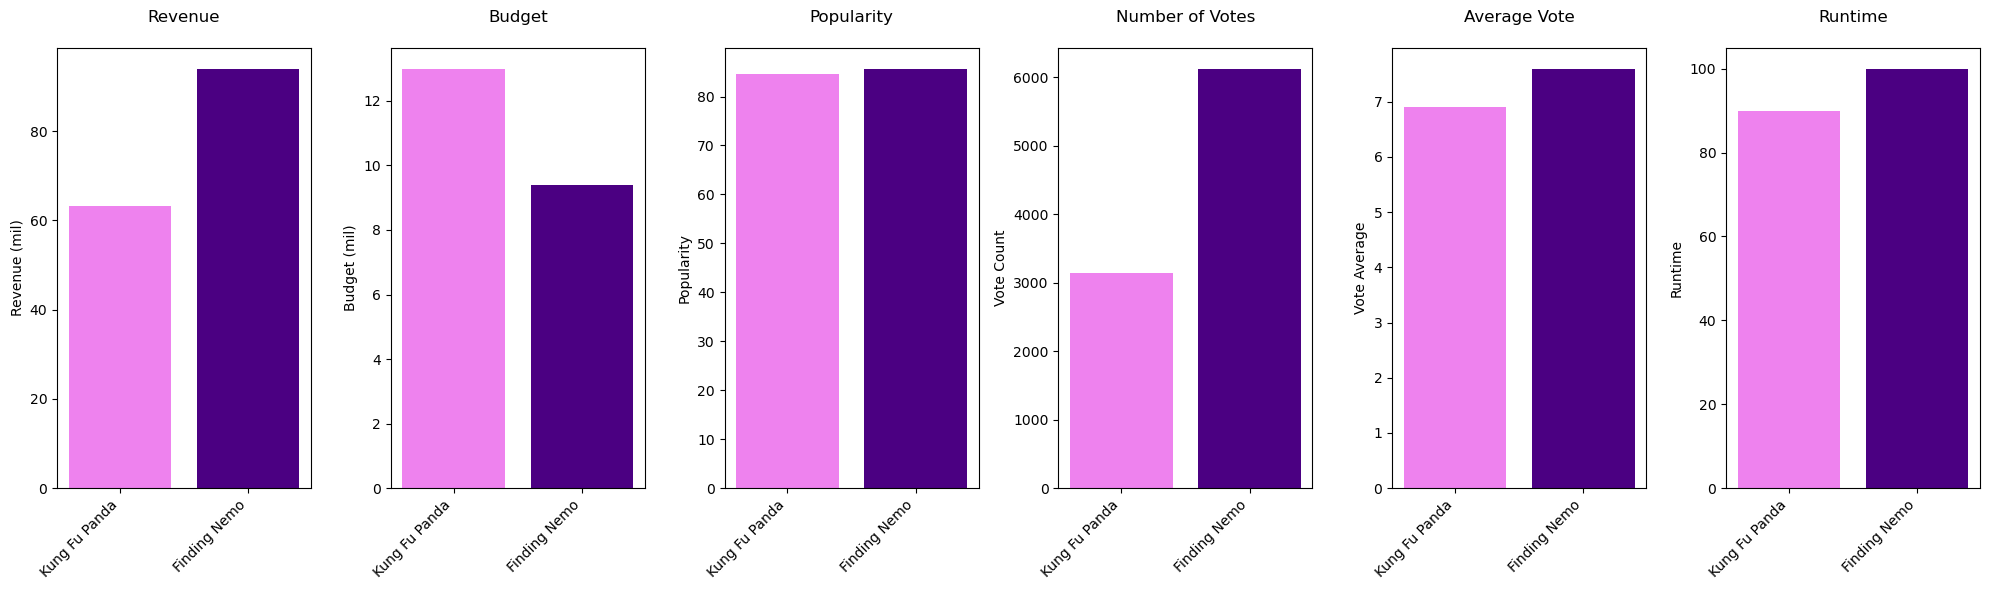

In [80]:
ftitle = favs['original_title']
frev = favs['revenue']/10000000
fbud = favs['budget']/10000000
fpop = favs['popularity']
fcount = favs['vote_count']
favg = favs['vote_average']
frun = favs['runtime']

fig, axes = plt.subplots(1,6 , figsize=(20, 6))

axes[0].bar(ftitle, frev, color = ['violet', 'indigo'])
axes[0].set_xticks(ftitle)
axes[0].set_xticklabels(ftitle, rotation=45, ha='right')
axes[0].set_ylabel('Revenue (mil)')
axes[0].set_title('Revenue''\n')

axes[1].bar(ftitle,fbud, color = ['violet', 'indigo'])
axes[1].set_xticks(ftitle)
axes[1].set_xticklabels(ftitle, rotation=45, ha='right')
axes[1].set_ylabel('Budget (mil)')
axes[1].set_title('Budget''\n')

axes[2].bar(ftitle,fpop, color = ['violet', 'indigo'])
axes[2].set_xticks(ftitle)
axes[2].set_xticklabels(ftitle, rotation=45, ha='right')
axes[2].set_ylabel('Popularity')
axes[2].set_title('Popularity''\n')

axes[3].bar(ftitle,fcount, color = ['violet', 'indigo'])
axes[3].set_xticks(ftitle)
axes[3].set_xticklabels(ftitle, rotation=45, ha='right')
axes[3].set_ylabel('Vote Count')
axes[3].set_title('Number of Votes''\n')

axes[4].bar(ftitle,favg, color = ['violet', 'indigo'])
axes[4].set_xticks(ftitle)
axes[4].set_xticklabels(ftitle, rotation=45, ha='right')
axes[4].set_ylabel('Vote Average')
axes[4].set_title('Average Vote''\n')

axes[5].bar(ftitle,frun, color = ['violet', 'indigo'])
axes[5].set_xticks(ftitle)
axes[5].set_xticklabels(ftitle, rotation=45, ha='right')
axes[5].set_ylabel('Runtime')
axes[5].set_title('Runtime''\n')

plt.tight_layout()
plt.show()